In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Make SQL Server Connection to load data

source : https://blog.devgenius.io/how-to-connect-query-sql-server-using-python-15c9d79d1207

In [2]:
#pip install pyodbc

In [3]:
#importing the library
import pyodbc

In [4]:
#database username. Use config file or env vars
uid = "INFA_CONN" 
#database password. Use config file or env vars
pwd = "INFA_CONN" 
driver = "{SQL Server Native Client 11.0}"
server = "localhost" # or your computer name
database = "gdp_warehouse;"

In [5]:
conn = pyodbc.connect('DRIVER=' + driver + ';SERVER=' + server + '\SQLEXPRESS' + ';DATABASE=' + database + ';UID=' + uid + ';PWD=' + pwd)

### Testing the connection

In [6]:
import warnings
warnings.filterwarnings('ignore') #turn off warnings

### Load Dimensions

#### Indicators Dimension

In [7]:
sql = "SELECT * FROM [dbo].[dim_indicator2]"

In [8]:
df_dim_indicator = pd.read_sql_query(sql, conn)
df_dim_indicator.head()

indicator_id     indicator_code                      indicator_name  \
0             1  NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
1             2  NY.GDP.MKTP.KD.ZG               GDP growth (annual %)   
2             3     NY.GDP.PCAP.CD        GDP per capita (current US$)   
3             4  NY.GDP.PCAP.KD.ZG    GDP per capita growth (annual %)   
4             5     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   

                                         source_note  \
0  Inflation as measured by the annual growth rat...   
1  Annual percentage growth rate of GDP at market...   
2  GDP per capita is gross domestic product divid...   
3  Annual percentage growth rate of GDP per capit...   
4  Gross savings are calculated as gross national...   

                                 source_organization             create_date  \
0  World Bank national accounts data, and OECD Na... 2023-11-20 08:42:26.960   
1  World Bank national accounts data, and OECD Na... 2023-11-20 08:42:26.960   
2  World Bank national accounts data, and OECD Na... 2023-11-20 08:42:26.960   
3  World Bank national accounts data, and OECD Na... 2023-11-20 08:42:26.960   
4  World Bank national accounts data, and OECD Na... 2023-11-20 08:42:26.960   

  update_date  
0        None  
1        None  
2        None  
3        None  
4        None

-------------------

#### Years Dimension

In [9]:
sql = "SELECT * FROM [dbo].[dim_time_period2]"

In [10]:
df_dim_time_period = pd.read_sql_query(sql, conn)
df_dim_time_period.head()

time_period_id  year_             create_date update_date
0               1   1960 2023-11-20 08:42:26.977        None
1               2   1961 2023-11-20 08:42:26.977        None
2               3   1962 2023-11-20 08:42:26.977        None
3               4   1963 2023-11-20 08:42:26.977        None
4               5   1964 2023-11-20 08:42:26.977        None

--------------

#### Regions Dimension

In [11]:
sql = "SELECT * FROM [dbo].[dim_regions2]"

In [12]:
df_dim_regions = pd.read_sql_query(sql, conn)
df_dim_regions.head()

region_id                 region_name             create_date update_date
0          1         East Asia & Pacific 2023-11-20 08:42:26.993        None
1          2       Europe & Central Asia 2023-11-20 08:42:26.993        None
2          3   Latin America & Caribbean 2023-11-20 08:42:26.993        None
3          4  Middle East & North Africa 2023-11-20 08:42:26.993        None
4          5               North America 2023-11-20 08:42:26.993        None

---------------

#### Income Dimension

In [13]:
sql = "SELECT * FROM [dbo].[dim_income2]"

In [14]:
df_dim_income = pd.read_sql_query(sql, conn)
df_dim_income.head()

income_id         income_group             create_date update_date
0          1          High income 2023-11-20 08:42:26.943        None
1          2           Low income 2023-11-20 08:42:26.943        None
2          3  Lower middle income 2023-11-20 08:42:26.943        None
3          4  Upper middle income 2023-11-20 08:42:26.943        None

-----------------

#### Country Dimension

In [15]:
sql = "SELECT * FROM [dbo].[dim_country2]"

In [16]:
df_dim_country = pd.read_sql_query(sql, conn)
df_dim_country.head()

country_id country_code                 country_name  \
0           1          ABW                        Aruba   
1           2          AFE  Africa Eastern and Southern   
2           3          AFG                  Afghanistan   
3           4          AFW   Africa Western and Central   
4           5          AGO                       Angola   

                                       special_notes  region_id  income_id  \
0                                               None        3.0        1.0   
1  26 countries, stretching from the Red Sea in t...        NaN        NaN   
2  The reporting period for national accounts dat...        6.0        2.0   
3  22 countries, stretching from the westernmost ...        NaN        NaN   
4  The World Bank systematically assesses the app...        7.0        3.0   

              create_date update_date  
0 2023-11-20 08:42:28.937        None  
1 2023-11-20 08:42:28.937        None  
2 2023-11-20 08:42:28.937        None  
3 2023-11-20 08:42:28.937        None  
4 2023-11-20 08:42:28.937        None

### Load Facts

In [17]:
sql = "SELECT * FROM [dbo].[fact_table2]"

In [18]:
df_fact = pd.read_sql_query(sql, conn)
df_fact.head()

fact_id  indicator_id  year_id  region_id  income_id  country_id  \
0        1             1       28        3.0        1.0           1   
1        2             1       29        3.0        1.0           1   
2        3             1       30        3.0        1.0           1   
3        4             1       31        3.0        1.0           1   
4        5             1       32        3.0        1.0           1   

   gdp_value             create_date update_date  
0   3.591970 2023-11-20 08:42:29.093        None  
1   3.108439 2023-11-20 08:42:29.093        None  
2   3.962543 2023-11-20 08:42:29.093        None  
3   5.769870 2023-11-20 08:42:29.093        None  
4   5.614860 2023-11-20 08:42:29.093        None

# Data Cleaning

### Removing unnecessary columns (create and update dates)?

In [19]:
df_dim_indicator = df_dim_indicator.drop(columns=['create_date','update_date'])
df_dim_time_period = df_dim_time_period.drop(columns=['create_date','update_date'])
df_dim_regions = df_dim_regions.drop(columns=['create_date','update_date'])
df_dim_income = df_dim_income.drop(columns=['create_date','update_date'])
df_dim_country = df_dim_country.drop(columns=['create_date','update_date'])
df_fact = df_fact.drop(columns=['create_date','update_date'])

<hr>

# Analysis of GDP Data

### Basic overview of the data:

In [20]:
fact_groupby_indicator_id = df_fact.groupby('indicator_id')
fact_groupby_country_id = df_fact.groupby('country_id')
fact_groupby_income_id = df_fact.groupby('income_id')
fact_groupby_year_id = df_fact.groupby('year_id')
fact_groupby_region_id = df_fact.groupby('region_id')
print(f'{len(fact_groupby_indicator_id)} different indicators are used in data collection')
print(f'{len(fact_groupby_year_id)} years are considered for gdp estimation. Starting from ',end='')
print(df_dim_time_period[df_dim_time_period.time_period_id==df_fact['year_id'].min()].loc[0, 'year_'],end=' to ')
print(df_dim_time_period[df_dim_time_period.time_period_id==df_fact['year_id'].max()].loc[df_fact['year_id'].max()-1, 'year_'])
print(f'{len(fact_groupby_country_id)} countries are considered for data collection')
print(f'{len(fact_groupby_income_id)} distinct income groups are present in the data')
print(f'{len(fact_groupby_region_id)} regions are present in the data')

5 different indicators are used in data collection
63 years are considered for gdp estimation. Starting from 1960 to 2022
262 countries are considered for data collection
4 distinct income groups are present in the data
7 regions are present in the data


<hr>

### Average GDP by Region

In [21]:
merged_df = pd.merge(df_fact,df_dim_country[['country_id','country_code','country_name','special_notes']],on='country_id')
merged_df = pd.merge(merged_df,df_dim_regions,on='region_id')
# merged_df
average_gdp_by_region = merged_df.groupby('region_name')['gdp_value'].mean()
print(average_gdp_by_region)

region_name
East Asia & Pacific           2002.732229
Europe & Central Asia         4628.724530
Latin America & Caribbean     1383.021614
Middle East & North Africa    2218.622731
North America                 7289.798274
South Asia                     248.709525
Sub-Saharan Africa             280.776134
Name: gdp_value, dtype: float64


### GDP Trends Over Years

GDP trends for each region over the years

In [22]:
merged_df = pd.merge(merged_df,df_dim_time_period,left_on='year_id',right_on='time_period_id')
merged_df = merged_df.drop(columns=['time_period_id']) 

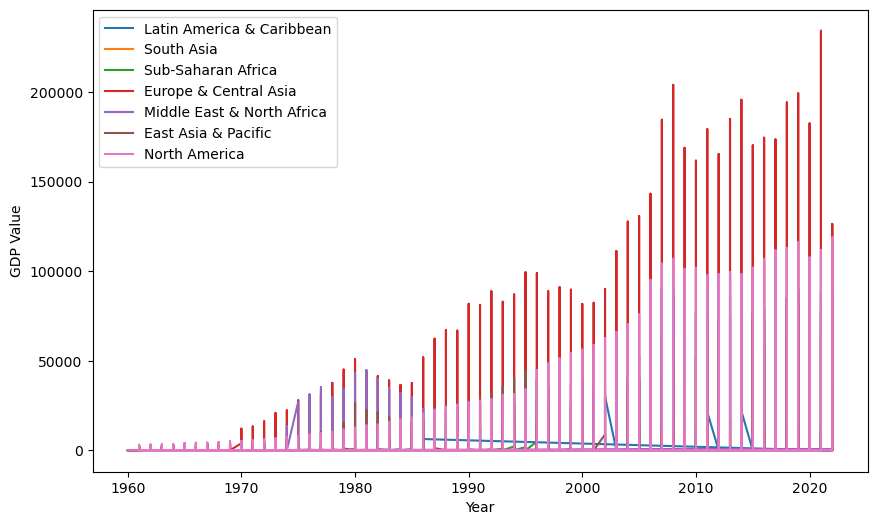

In [23]:
plt.figure(figsize=(10,6))
for region in merged_df['region_name'].unique():
    region_data = merged_df[merged_df['region_name'] == region]
    plt.plot(region_data['year_'],region_data['gdp_value'],label=region)
plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.legend()
plt.show()

# Distribution of GDP by Income Group

visualization of distribution of GDP values across different income groups

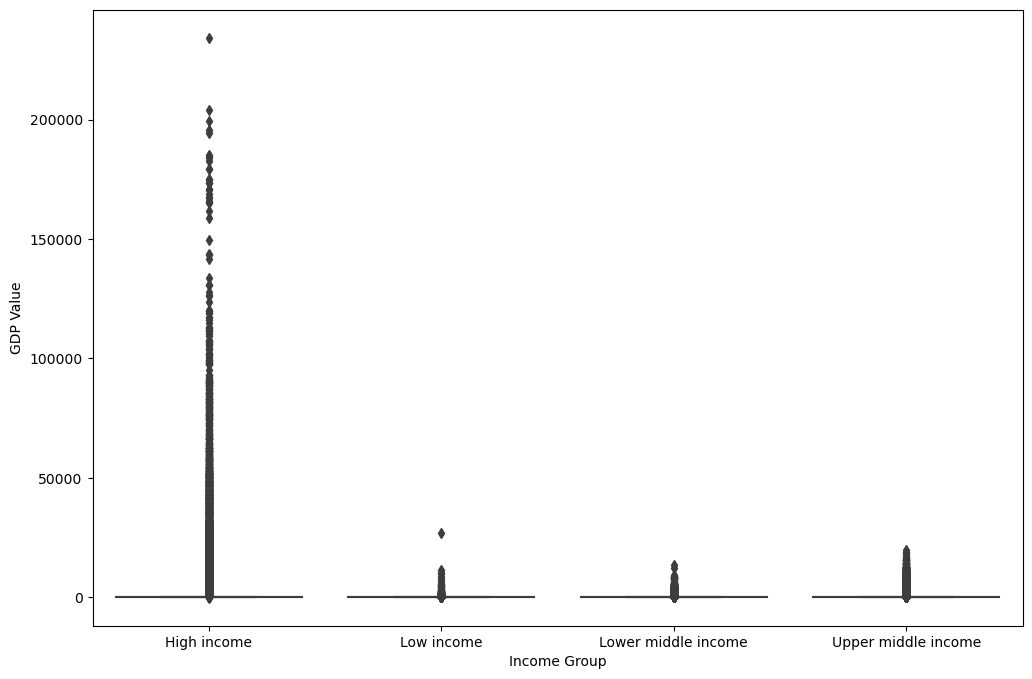

In [24]:
merged_df = pd.merge(df_fact,df_dim_income,on='income_id')
plt.figure(figsize=(12,8))
sns.boxplot(x='income_group',y='gdp_value',data=merged_df)
plt.xlabel('Income Group')
plt.ylabel('GDP Value')
plt.show()

# Time Series Analysis : GDP over the years

In [25]:
merged_df = pd.merge(df_fact,df_dim_time_period,left_on='year_id',right_on='time_period_id')
merged_df['year_'] = pd.to_datetime(merged_df['year_'],format='%Y')
merged_df.set_index('year_',inplace=True)
merged_df

fact_id  indicator_id  year_id  region_id  income_id  country_id  \
year_                                                                          
1987-01-01        1             1       28        3.0        1.0           1   
1987-01-01       62             1       28        NaN        NaN           2   
1987-01-01      143             1       28        NaN        NaN           4   
1987-01-01      185             1       28        7.0        3.0           5   
1987-01-01      227             1       28        2.0        4.0           6   
...             ...           ...      ...        ...        ...         ...   
1960-01-01    38365             3        1        NaN        NaN         259   
1960-01-01    38517             3        1        7.0        4.0         263   
1960-01-01    38580             3        1        7.0        3.0         264   
1960-01-01    38643             3        1        7.0        3.0         265   
1960-01-01    58970             5        1        7.0        4.0         263   

            gdp_value  time_period_id  
year_                                  
1987-01-01   3.591970              28  
1987-01-01  11.735784              28  
1987-01-01   1.684563              28  
1987-01-01   9.823311              28  
1987-01-01  -0.000306              28  
...               ...             ...  
1960-01-01   4.000000               1  
1960-01-01   5.000000               1  
1960-01-01   2.000000               1  
1960-01-01   2.000000               1  
1960-01-01   2.000000               1  

[59074 rows x 8 columns]

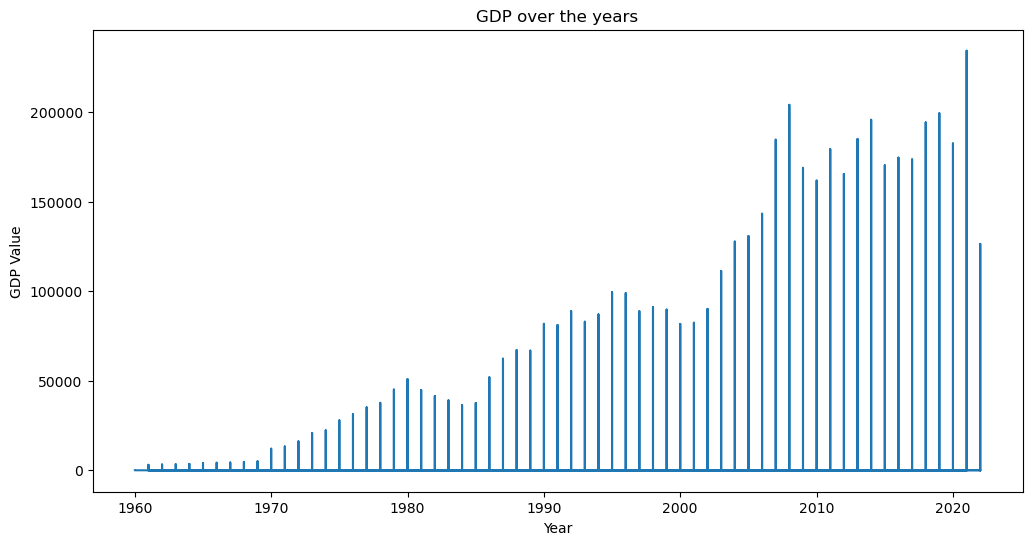

In [26]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['gdp_value'])
plt.title('GDP over the years')
plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.show()

<hr>

### Comparision of Country's performance for each indicator

For a given country code, a comparision of performance evaluation by each indicator over the years is given.

In [27]:
merged_df = pd.merge(df_fact,df_dim_country[['country_id','country_code','country_name','special_notes']],on='country_id')
merged_df = pd.merge(merged_df,df_dim_time_period,left_on='year_id',right_on='time_period_id')
merged_df = merged_df.drop(columns=['time_period_id'])
merged_df = pd.merge(merged_df,df_dim_indicator,on='indicator_id')
merged_df

fact_id  indicator_id  year_id  region_id  income_id  country_id  \
0            1             1       28        3.0        1.0           1   
1           62             1       28        NaN        NaN           2   
2          143             1       28        NaN        NaN           4   
3          185             1       28        7.0        3.0           5   
4          227             1       28        2.0        4.0           6   
...        ...           ...      ...        ...        ...         ...   
59069    58795             5       63        2.0        3.0         252   
59070    58954             5       63        1.0        3.0         260   
59071    58969             5       63        2.0        4.0         261   
59072    59032             5       63        7.0        4.0         263   
59073    58970             5        1        7.0        4.0         263   

       gdp_value country_code                 country_name  \
0       3.591970          ABW                        Aruba   
1      11.735784          AFE  Africa Eastern and Southern   
2       1.684563          AFW   Africa Western and Central   
3       9.823311          AGO                       Angola   
4      -0.000306          ALB                      Albania   
...          ...          ...                          ...   
59069  37.504285          UZB                   Uzbekistan   
59070  25.892329          WSM                        Samoa   
59071  24.460047          XKX                       Kosovo   
59072  14.853015          ZAF                 South Africa   
59073   2.000000          ZAF                 South Africa   

                                           special_notes  year_  \
0                                                   None   1987   
1      26 countries, stretching from the Red Sea in t...   1987   
2      22 countries, stretching from the westernmost ...   1987   
3      The World Bank systematically assesses the app...   1987   
4                                                   None   1987   
...                                                  ...    ...   
59069                                               None   2022   
59070  The reporting period for national accounts dat...   2022   
59071                                               None   2022   
59072  Fiscal year end: March 31; reporting period fo...   2022   
59073  Fiscal year end: March 31; reporting period fo...   1960   

          indicator_code                      indicator_name  \
0      NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
1      NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
2      NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
3      NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
4      NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
...                  ...                                 ...   
59069     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   
59070     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   
59071     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   
59072     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   
59073     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   

                                             source_note  \
0      Inflation as measured by the annual growth rat...   
1      Inflation as measured by the annual growth rat...   
2      Inflation as measured by the annual growth rat...   
3      Inflation as measured by the annual growth rat...   
4      Inflation as measured by the annual growth rat...   
...                                                  ...   
59069  Gross savings are calculated as gross national...   
59070  Gross savings are calculated as gross national...   
59071  Gross savings are calculated as gross national...   
59072  Gross savings are calculated as gross national...   
59073  Gross savings are calculated as gross national...   

                                     source_organization  
0      

In [28]:
country_code = input('Enter the country code :')
country_df = merged_df[merged_df['country_code'] == country_code]

Enter the country code :XKX


In [29]:
country_df

fact_id  indicator_id  year_id  region_id  income_id  country_id  \
5365     12378             1       50        2.0        4.0         261   
5620     12379             1       51        2.0        4.0         261   
5875     12380             1       52        2.0        4.0         261   
6130     12381             1       53        2.0        4.0         261   
6385     12382             1       54        2.0        4.0         261   
...        ...           ...      ...        ...        ...         ...   
57056    58965             5       59        2.0        4.0         261   
57261    58966             5       60        2.0        4.0         261   
57460    58967             5       61        2.0        4.0         261   
57646    58968             5       62        2.0        4.0         261   
59071    58969             5       63        2.0        4.0         261   

       gdp_value country_code country_name special_notes  year_  \
5365   -2.833157          XKX       Kosovo          None   2009   
5620    6.392429          XKX       Kosovo          None   2010   
5875    6.303690          XKX       Kosovo          None   2011   
6130    3.525404          XKX       Kosovo          None   2012   
6385    0.353023          XKX       Kosovo          None   2013   
...          ...          ...          ...           ...    ...   
57056  28.635588          XKX       Kosovo          None   2018   
57261  28.879968          XKX       Kosovo          None   2019   
57460  26.583254          XKX       Kosovo          None   2020   
57646  27.220448          XKX       Kosovo          None   2021   
59071  24.460047          XKX       Kosovo          None   2022   

          indicator_code                      indicator_name  \
5365   NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
5620   NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
5875   NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
6130   NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
6385   NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
...                  ...                                 ...   
57056     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   
57261     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   
57460     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   
57646     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   
59071     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   

                                             source_note  \
5365   Inflation as measured by the annual growth rat...   
5620   Inflation as measured by the annual growth rat...   
5875   Inflation as measured by the annual growth rat...   
6130   Inflation as measured by the annual growth rat...   
6385   Inflation as measured by the annual growth rat...   
...                                                  ...   
57056  Gross savings are calculated as gross national...   
57261  Gross savings are calculated as gross national...   
57460  Gross savings are calculated as gross national...   
57646  Gross savings are calculated as gross national...   
59071  Gross savings are calculated as gross national...   

                                     source_organization  
5365   World Bank national accounts data, and OECD Na...  
5620   World Bank national accounts data, and OECD Na...  
5875   World Bank national accounts data, and OECD Na...  
6130   World Bank national accounts data, and OECD Na...  
6385   World Bank national accounts data, and OECD Na...  
...                                                  ...  
57056  World Bank national accounts data, and OECD Na...  
57261  World Bank national accounts data, and OECD Na...  
57460  World Bank national accounts data, and OECD Na...  
57646  World Bank national accounts data, and OECD Na...  
59071  World Bank national accounts data, and OECD Na...  

[72 rows x 15 columns]

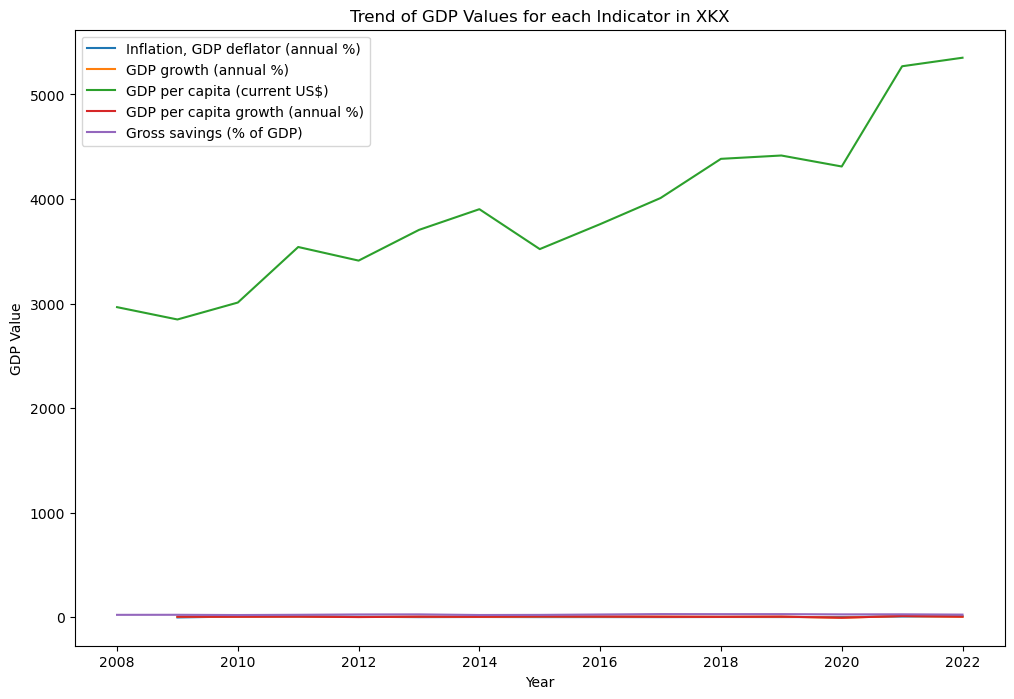

In [30]:
plt.figure(figsize=(12,8))
for indicator in country_df['indicator_name'].unique():
    indicator_data = country_df[country_df['indicator_name']==indicator]
    plt.plot(indicator_data['year_'],indicator_data['gdp_value'],label=indicator)
plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.title(f'Trend of GDP Values for each Indicator in {country_code}')
plt.legend()
plt.show()

### Comparision of  GDP values of each country, in terms of indicator

In [31]:
# merged_df = pd.merge(df_fact,df_dim_country[['country_id','country_code','country_name','special_notes']],on='country_id')
# merged_df = pd.merge(merged_df,df_dim_time_period,left_on='year_id',right_on='time_period_id')
# merged_df = merged_df.drop(columns=['time_period_id'])
# merged_df = pd.merge(merged_df,df_dim_indicator,on='indicator_id')
# merged_df

In [32]:
print('List of available indicators : ')
df_dim_indicator

List of available indicators : 


indicator_id     indicator_code                      indicator_name  \
0             1  NY.GDP.DEFL.KD.ZG  Inflation, GDP deflator (annual %)   
1             2  NY.GDP.MKTP.KD.ZG               GDP growth (annual %)   
2             3     NY.GDP.PCAP.CD        GDP per capita (current US$)   
3             4  NY.GDP.PCAP.KD.ZG    GDP per capita growth (annual %)   
4             5     NY.GNS.ICTR.ZS            Gross savings (% of GDP)   

                                         source_note  \
0  Inflation as measured by the annual growth rat...   
1  Annual percentage growth rate of GDP at market...   
2  GDP per capita is gross domestic product divid...   
3  Annual percentage growth rate of GDP per capit...   
4  Gross savings are calculated as gross national...   

                                 source_organization  
0  World Bank national accounts data, and OECD Na...  
1  World Bank national accounts data, and OECD Na...  
2  World Bank national accounts data, and OECD Na...  
3  World Bank national accounts data, and OECD Na...  
4  World Bank national accounts data, and OECD Na...

In [33]:
indicator_id = int(input('Enter the indicator id : '))
indicator_df = merged_df[merged_df['indicator_id'] == indicator_id]

Enter the indicator id : 3


In [34]:
indicator_df

fact_id  indicator_id  year_id  region_id  income_id  country_id  \
25336    25338             3       28        3.0        1.0           1   
25337    25400             3       28        NaN        NaN           2   
25338    25505             3       28        NaN        NaN           4   
25339    25548             3       28        7.0        3.0           5   
25340    25587             3       28        2.0        4.0           6   
...        ...           ...      ...        ...        ...         ...   
38700    38209             3        1        3.0        NaN         254   
38701    38365             3        1        NaN        NaN         259   
38702    38517             3        1        7.0        4.0         263   
38703    38580             3        1        7.0        3.0         264   
38704    38643             3        1        7.0        3.0         265   

         gdp_value country_code                 country_name  \
25336  7567.253642          ABW                        Aruba   
25337   656.115225          AFE  Africa Eastern and Southern   
25338   580.461595          AFW   Africa Western and Central   
25339   755.972445          AGO                       Angola   
25340   674.793383          ALB                      Albania   
...            ...          ...                          ...   
38700     9.000000          VEN                Venezuela, RB   
38701     4.000000          WLD                        World   
38702     5.000000          ZAF                 South Africa   
38703     2.000000          ZMB                       Zambia   
38704     2.000000          ZWE                     Zimbabwe   

                                           special_notes  year_  \
25336                                               None   1987   
25337  26 countries, stretching from the Red Sea in t...   1987   
25338  22 countries, stretching from the westernmost ...   1987   
25339  The World Bank systematically assesses the app...   1987   
25340                                               None   1987   
...                                                  ...    ...   
38700                                               None   1960   
38701                                   World aggregate.   1960   
38702  Fiscal year end: March 31; reporting period fo...   1960   
38703  National accounts data were rebased to reflect...   1960   
38704  National Accounts data are reported in Zimbabw...   1960   

       indicator_code                indicator_name  \
25336  NY.GDP.PCAP.CD  GDP per capita (current US$)   
25337  NY.GDP.PCAP.CD  GDP per capita (current US$)   
25338  NY.GDP.PCAP.CD  GDP per capita (current US$)   
25339  NY.GDP.PCAP.CD  GDP per capita (current US$)   
25340  NY.GDP.PCAP.CD  GDP per capita (current US$)   
...               ...                           ...   
38700  NY.GDP.PCAP.CD  GDP per capita (current US$)   
38701  NY.GDP.PCAP.CD  GDP per capita (current US$)   
38702  NY.GDP.PCAP.CD  GDP per capita (current US$)   
38703  NY.GDP.PCAP.CD  GDP per capita (current US$)   
38704  NY.GDP.PCAP.CD  GDP per capita (current US$)   

                                             source_note  \
25336  GDP per capita is gross domestic product divid...   
25337  GDP per capita is gross domestic product divid...   
25338  GDP per capita is gross domestic product divid...   
25339  GDP per capita is gross domestic product divid...   
25340  GDP per capita is gross domestic product divid...   
...                                                  ...   
38700  GDP per capita is gross domestic product divid...   
38701  GDP per capita is gross domestic product divid...   
38702  GDP per capita is gross domestic product divid...   
38703  GDP per capita is gross domestic product divid...   
38704  GDP per capita is gross domestic product divid...   

                                     source_organization  
25336  World Bank national accounts data, and OECD Na...  
25337  World Bank national accou

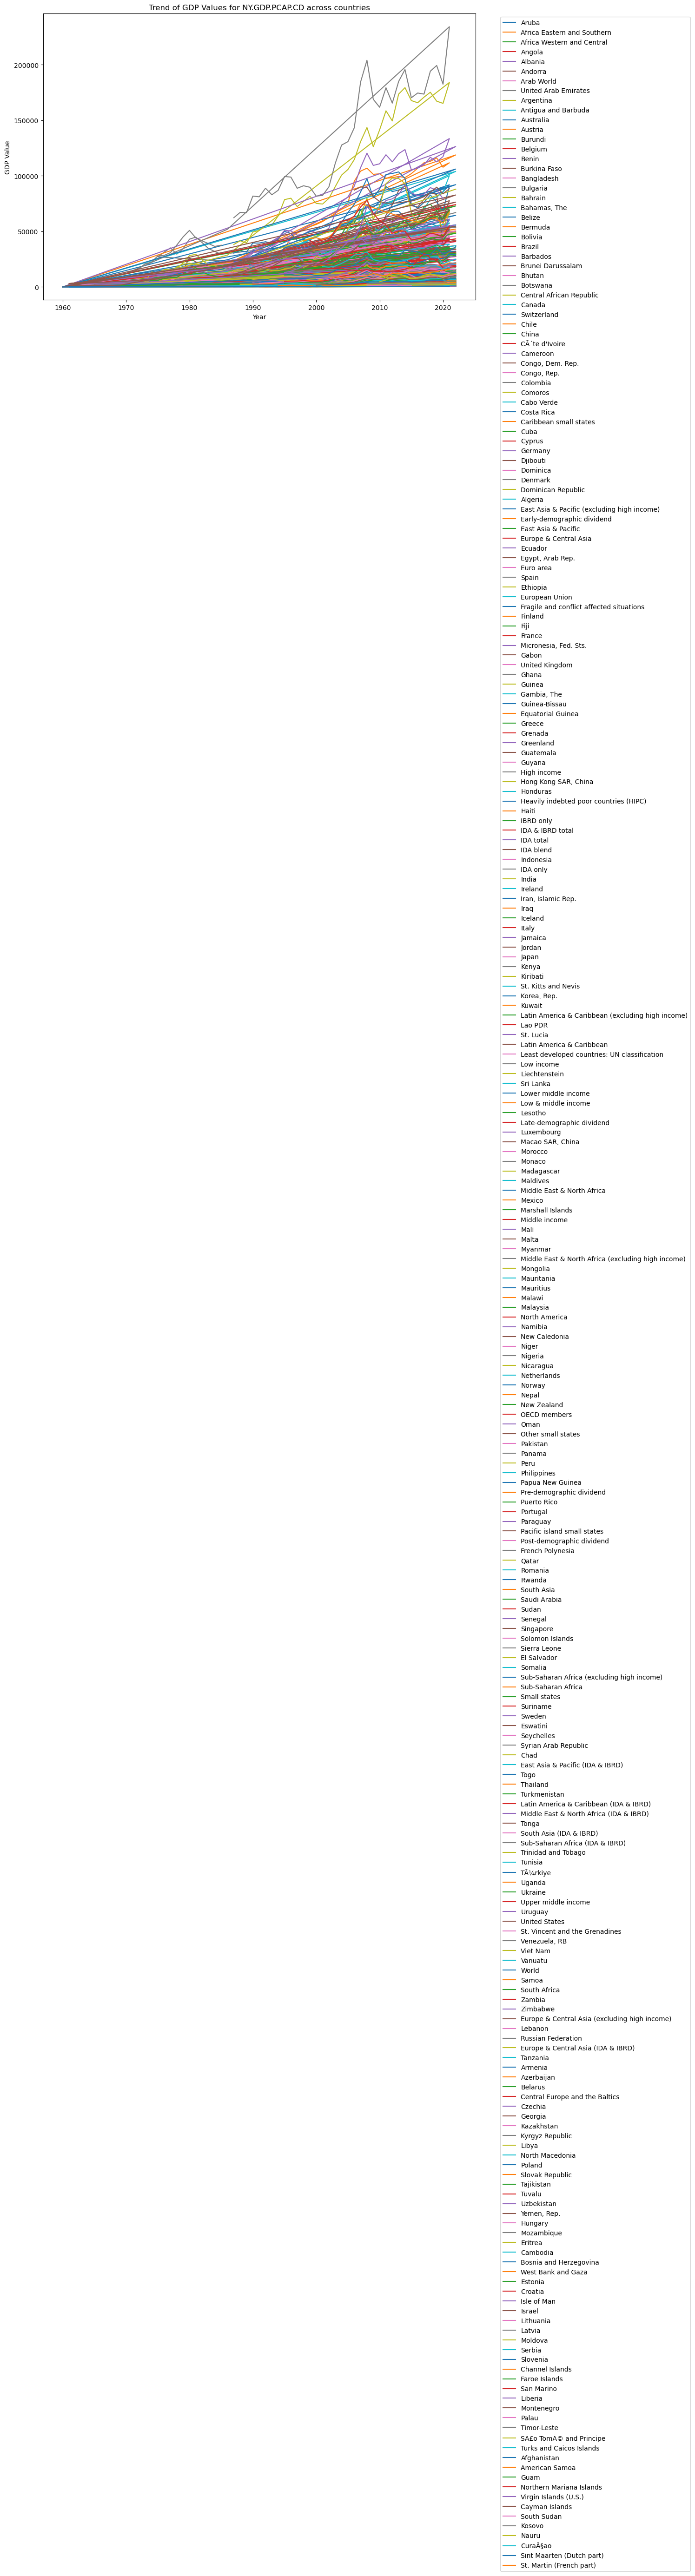

In [36]:
plt.figure(figsize=(12,8))
for country in indicator_df['country_name'].unique():
    country_data = indicator_df[indicator_df['country_name'] == country]
    plt.plot(country_data['year_'],country_data['gdp_value'],label=country)
    
ind_code = indicator_df['indicator_code'].unique()[0]
plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.title(f'Trend of GDP Values for {ind_code} across countries')
plt.legend(bbox_to_anchor=(1.05,1),loc='best')
plt.show()

### Trends of each region for each indicator

A performance analysis of GDP value of all countries over the years for a given region and indicator

In [41]:
regions = list(df_dim_regions['region_name'].unique())

In [43]:
merged_df_regions = pd.merge(merged_df,df_dim_regions,on='region_id')

In [45]:
regions_df = merged_df_regions[merged_df_regions['region_name'] == regions[0]]

In [49]:
for indicator in regions_df['indicator_name'].unique():
    indicator_data = merged_df_regions[merged_df_regions['indicator_name'] == indicator]
    print(indicator)
#     for country in indicator_data['country_name'].unique():
#         country_data = indicator_data[indicator_data['country_name'] == country]
#         plt.plot(country_data['year_'],country_data['gdp_value'],label=f'{country} - {indicator}')

Inflation, GDP deflator (annual %)
GDP growth (annual %)
GDP per capita (current US$)
GDP per capita growth (annual %)
Gross savings (% of GDP)


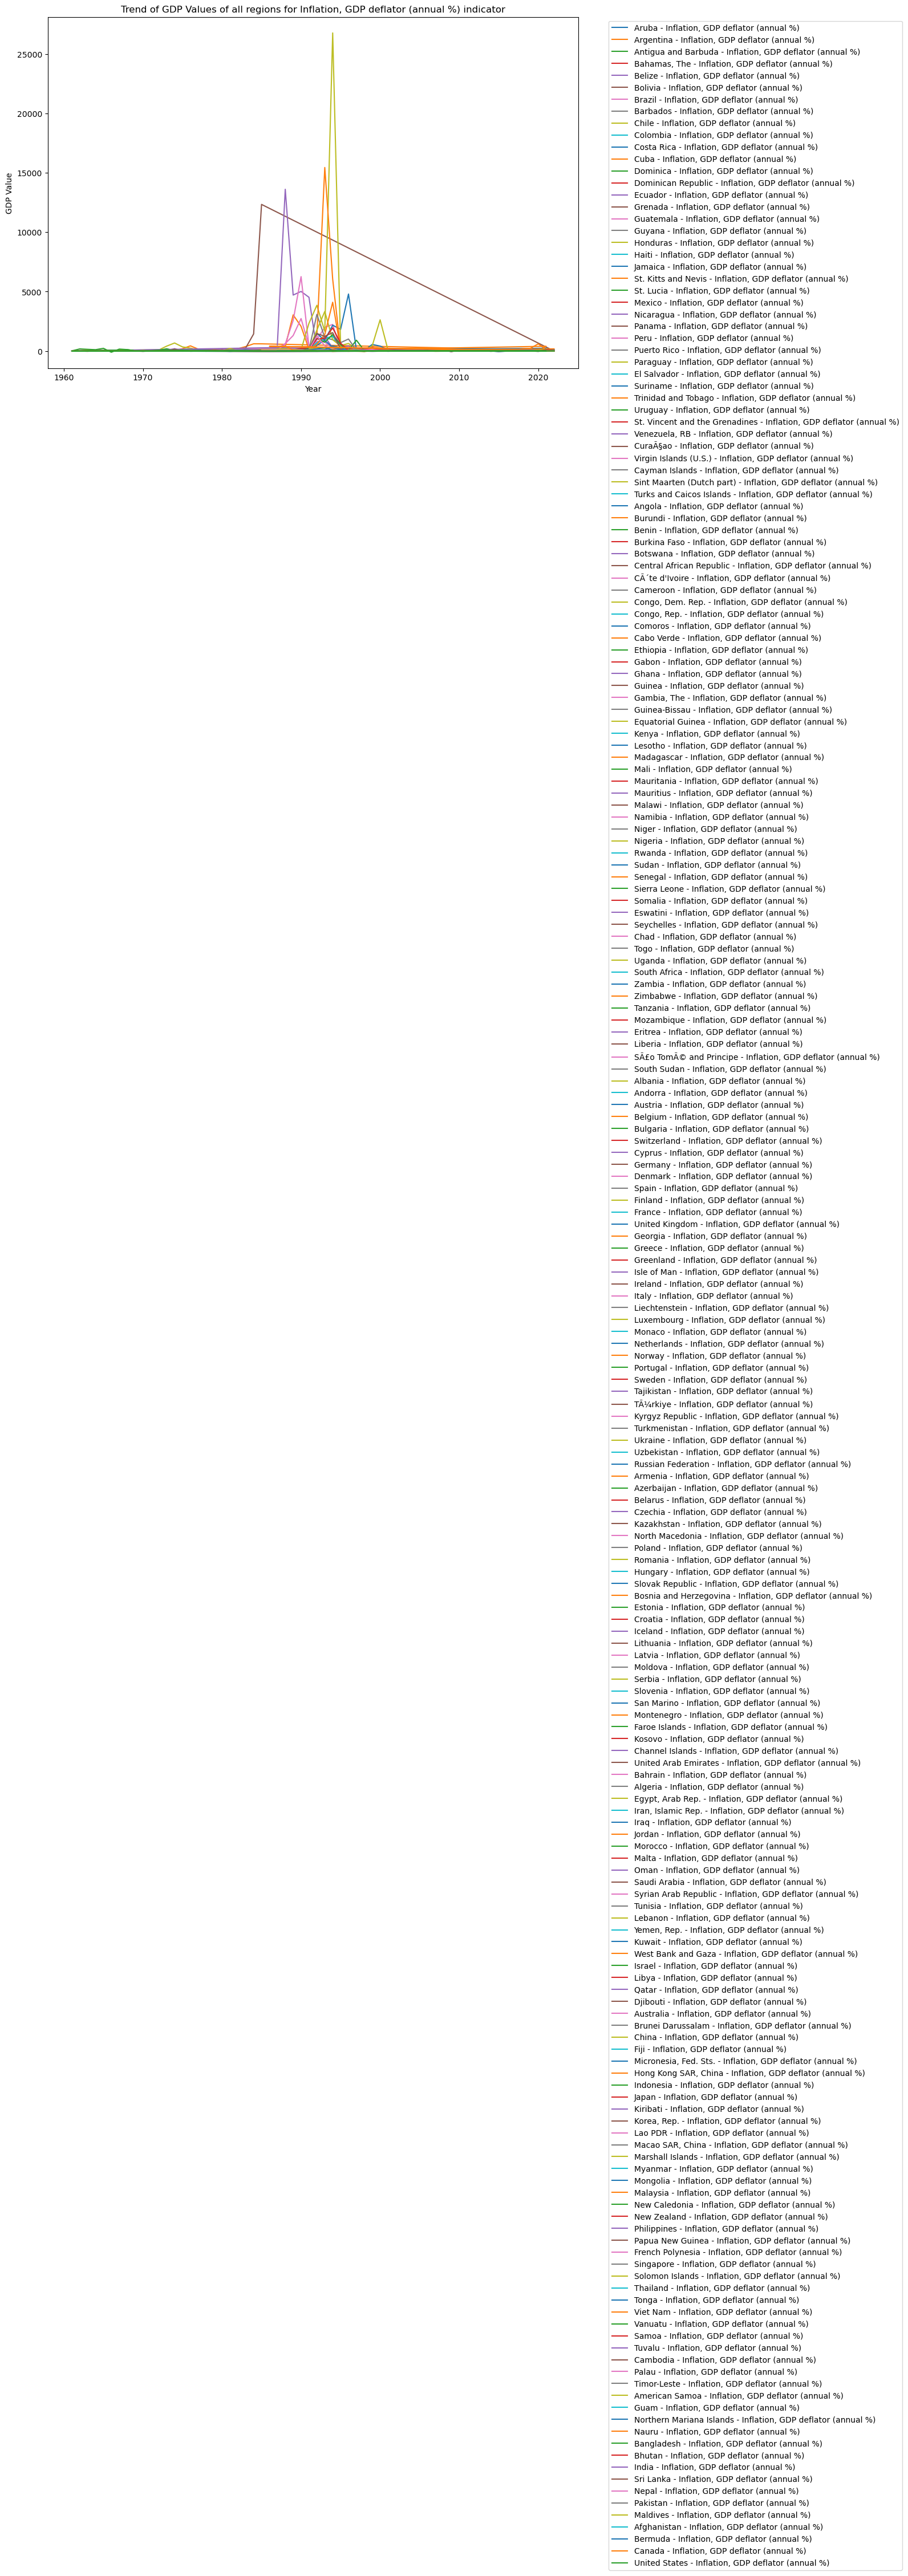

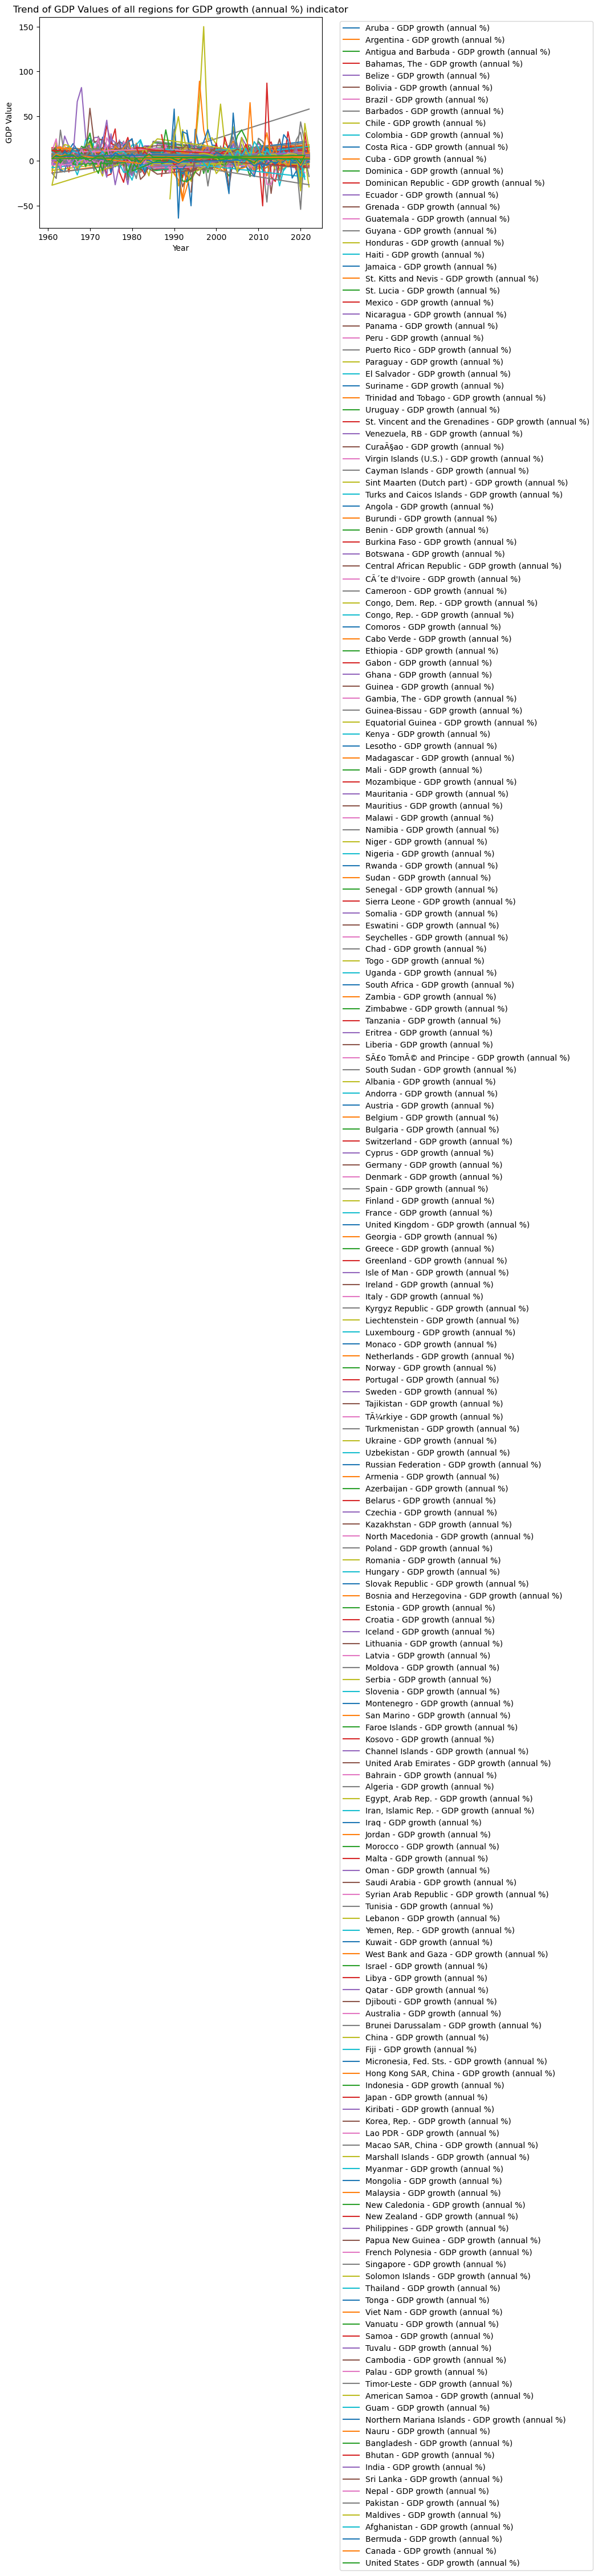

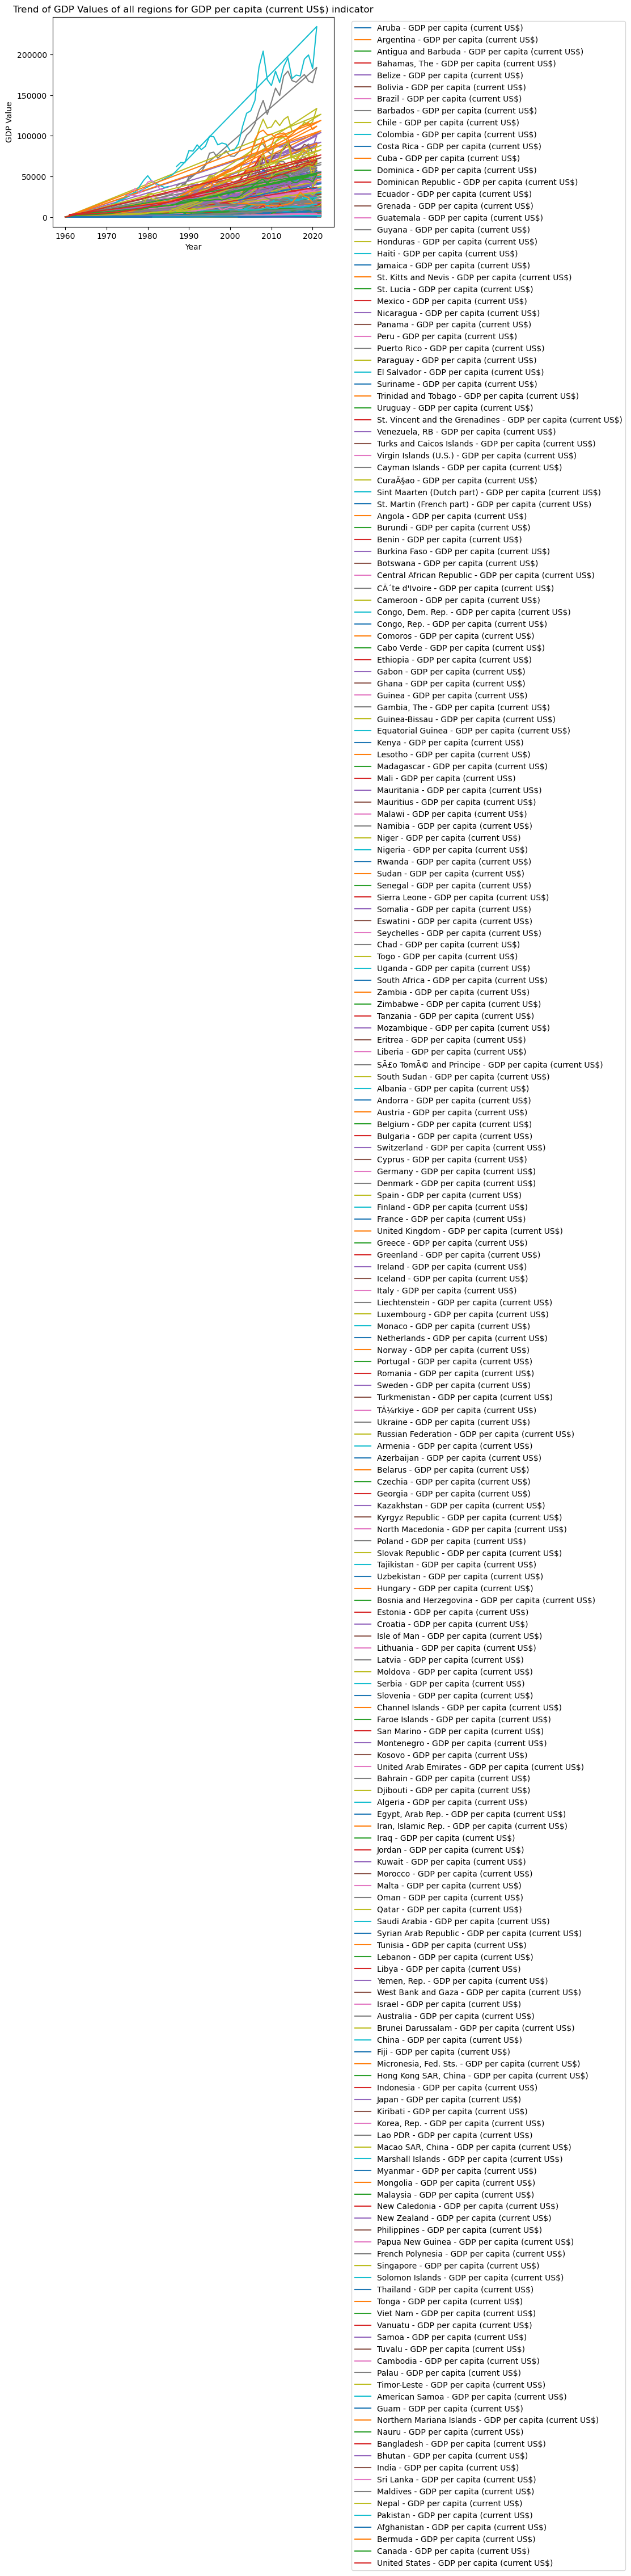

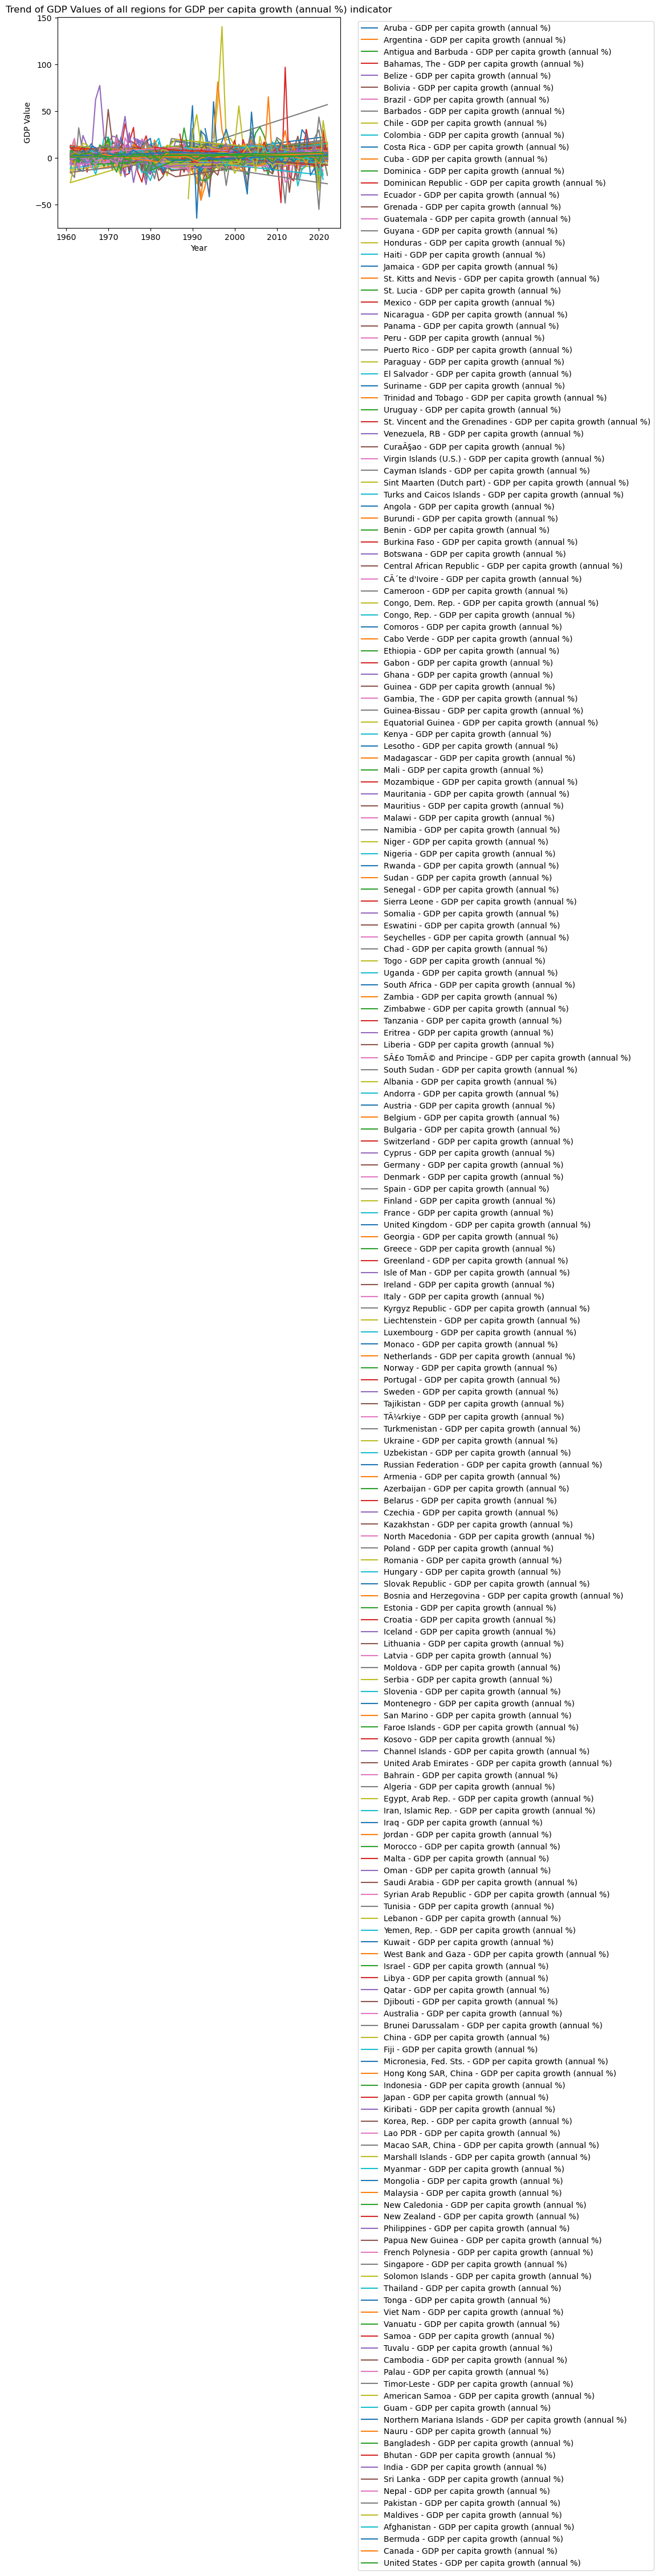

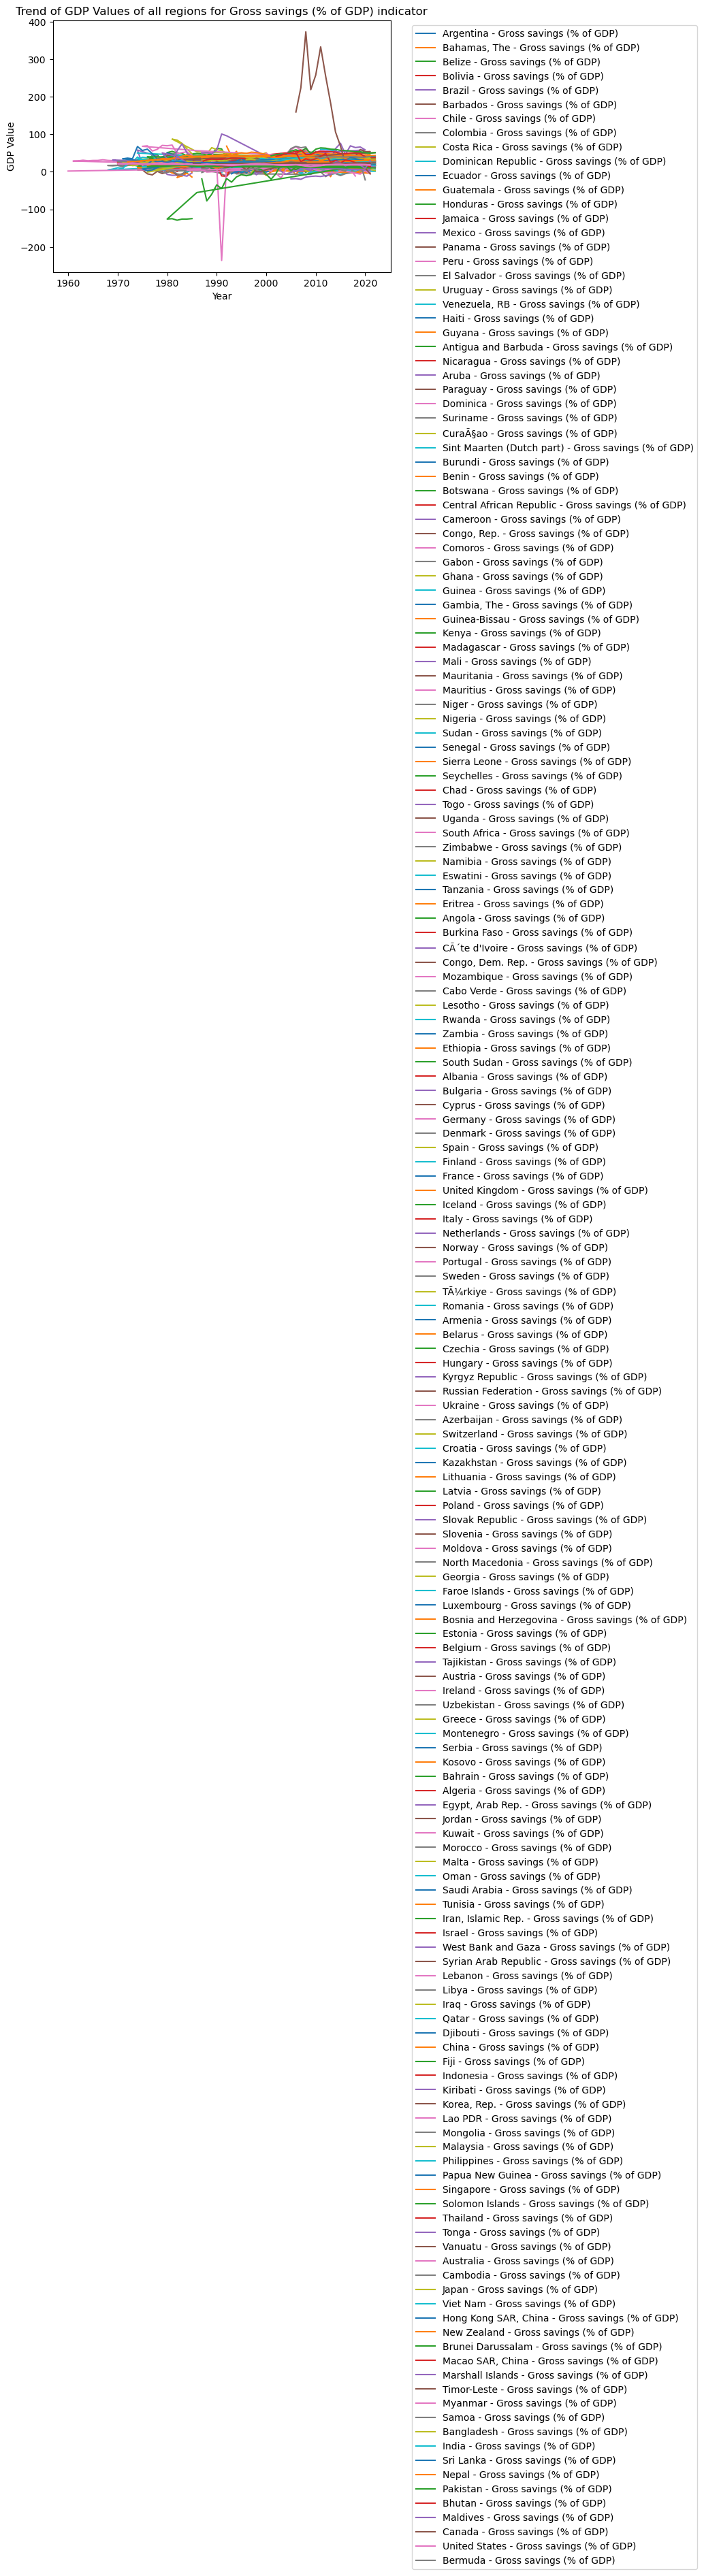

In [53]:
plt.figure(figsize=(12,8))
for indicator in regions_df['indicator_name'].unique():
    indicator_data = merged_df_regions[merged_df_regions['indicator_name'] == indicator]
    for country in indicator_data['country_name'].unique():
        country_data = indicator_data[indicator_data['country_name'] == country]
        plt.plot(country_data['year_'],country_data['gdp_value'],label=f'{country} - {indicator}')
    plt.xlabel('Year')
    plt.ylabel('GDP Value')
    plt.title(f'Trend of GDP Values of all regions for {indicator} indicator')
    plt.legend(bbox_to_anchor=(1.05,1))
    plt.show()

### Overall gdp performance of each country

### Performance of each country over the years

### Top Countries with highest GDP per capita

https://muskanjindal242.medium.com/gdp-analysis-using-countries-of-the-world-dataset-with-python-a8b45fec0d44

#### Extract countries and their corresponding maximum gdp

In [23]:
#for indicator_id = 1, each country_id and corresponding highest gdp value
#df_fact[df_fact['indicator_id']==1].groupby('country_id').gdp_value.max() #series datatype

countries_max_gdp_df = df_fact[df_fact['indicator_id']==1].groupby('country_id').gdp_value.max().to_frame() #dataframe datatype
#adding country id as a column
countries_max_gdp_df['country_id'] = countries_max_gdp_df.index
countries_max_gdp_df
# type(df_fact[df_fact['indicator_id']==1].groupby('country_id').gdp_value.max())

gdp_value  country_id
country_id                         
1              6.592951           1
2             22.026565           2
3             22.527756           3
4             25.062044           4
5           4800.531644           5
...                 ...         ...
261            8.710799         261
262           46.476251         262
263           23.046166         263
264          165.533954         264
265          604.945864         265

[261 rows x 2 columns]

In [24]:
type(df_fact[df_fact['indicator_id']==1].groupby('country_id').gdp_value.max())

pandas.core.series.Series

#### Top 10 countries with maximum gdp over the time period of 1960 to 2022

In [25]:
#sort the dataframe in descending order
countries_max_gdp_df.sort_values(by=['gdp_value'], ascending=False)

gdp_value  country_id
country_id                          
44          26765.858250          44
83          15444.384250          83
175         13611.634820         175
29          12338.660220          29
186          6261.239559         186
...                  ...         ...
1               6.592951           1
94              5.064408          94
39              4.397719          39
53              3.396310          53
57              1.807101          57

[261 rows x 2 columns]

### Comparing GDPs of two countries

### Country wise 

### Best year output of each country based on GDP

### Time series analyis

------------------

# GDP Prediction

-  Nominal GDP estimates are commonly used to determine the economic performance of a whole country of region, and to make international comparisions.

- GDP has large impact on people living in that economy. It affects their lifestyle, health, and also on the stock market. Study of different articles on GDP has led us to identify some of the factors affecting GDP such as natural income, net exports, gross savings and salaries of the people, Government expenditure and investment and the personal income.

- It is important to analyze the effect of the above mentioned factors on the GDP so as to predict the future performance of the economy and to take necessary measures to prevent a crisis in the future.

- For this analysis, we have imported the United States quarterly GDP data from quandl.

- Likewise, the columns have been taken from quandl according to their importance to the GDP. 

- With this data, we'll forecast the factors affecting the GDP and will predict the GDP based on the forecasted factors. 

- For this we are using the ARIMA method for forecasting and Multivariate regression for predicting the future GDP.